In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

import plotly.express as px



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
df = pd.read_csv('data/Student Scores.csv')

df.head()

,Previous Score,Sleeping Hours,Practice exam,Delegation,Scholarship,Final Score
0,79.967142,7.522429,2,Xochimilco,Yes,55.581794
1,73.617357,7.424985,5,Coyoacan,No,68.827108
2,81.476885,5.595220,3,Iztapalapa,No,46.711597
3,90.230299,7.869376,3,Iztapalapa,No,73.924212
4,72.658466,4.764876,4,Xochimilco,Yes,64.461809


To convert the vocabulary into a numerical format, we will use one-hot encoding.

In this method, similar to natural language processing (NLP), each column represents a word in the vocabulary, while each row indicates the presence or absence of that word in the document.

However, we must avoid the encoding trap by removing one of the columns. This is because the remaining columns can represent the entire vocabulary, preventing redundancy and maintaining the uniqueness of the data.



In [4]:
''' 
From the outputs is easy to tell  there are two objects
that will lead us to use OneHotEncoder
'''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Previous Score  20000 non-null  float64
 1   Sleeping Hours  20000 non-null  float64
 2   Practice exam   20000 non-null  int64  
 3   Delegation      20000 non-null  object 
 4   Scholarship     20000 non-null  object 
 5   Final Score     20000 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 937.6+ KB


In [5]:
df.describe()

,Previous Score,Sleeping Hours,Practice exam,Final Score
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,75.035113,6.984854,4.529400,69.888267
std,9.960723,1.496505,2.889075,17.696941
min,35.775997,0.301594,0.000000,17.290977
25%,68.337232,5.952116,2.000000,56.677445
50%,75.077005,6.989149,5.000000,70.251305
75%,81.819069,8.007413,7.000000,83.383641
max,100.000000,12.000000,9.000000,100.000000


"\n\nThe hue parameter splits the data based on the values in the column 'Scholarship'. \nIt creates separate box plots for different categories or groups, in this case \nstudents with or without scholarships\n\n"

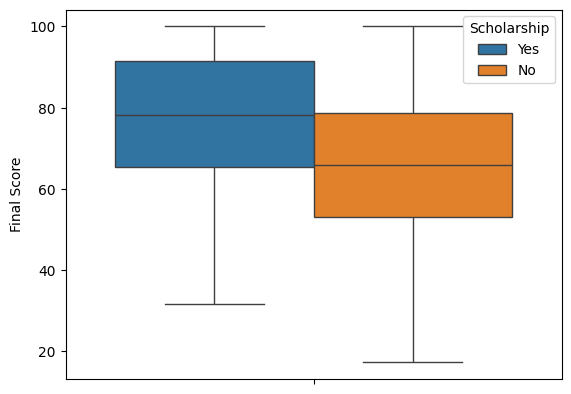

In [6]:
sns.boxplot(df, y='Final Score', hue='Scholarship')

'''

The hue parameter splits the data based on the values in the column 'Scholarship'. 
It creates separate box plots for different categories or groups, in this case 
students with or without scholarships

'''

<Axes: ylabel='Final Score'>

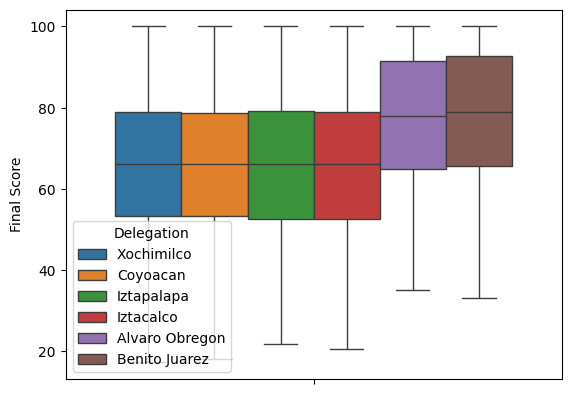

In [7]:
sns.boxplot(df, y='Final Score', hue='Delegation')

# The 'hue' separates the students by different delegation and 
# boxplots the sudents Final score

'\nBlue = with\nOrange = without\n\n'

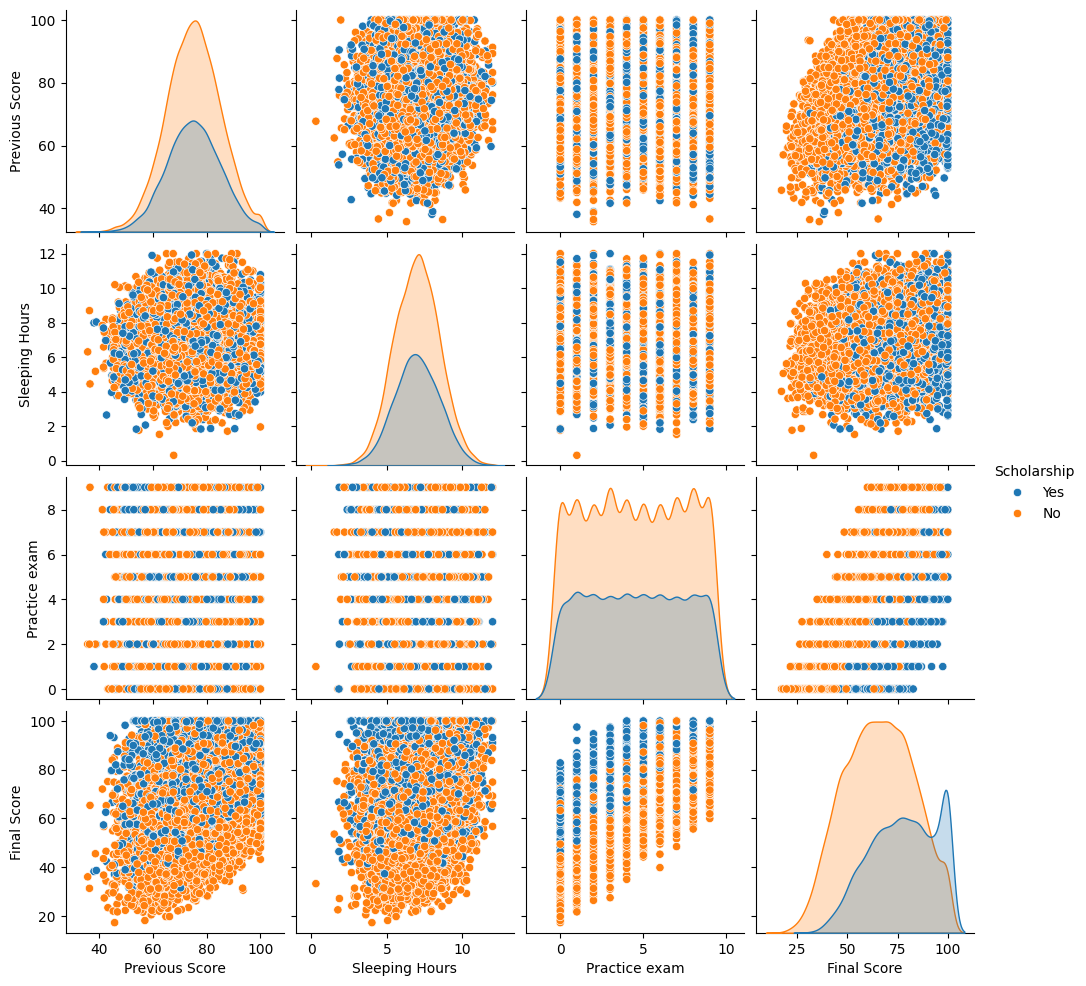

In [8]:
sns.pairplot(df, hue='Scholarship')

# This line compares the overall dataframe between with and without scholarship

'''
Blue = with
Orange = without

'''

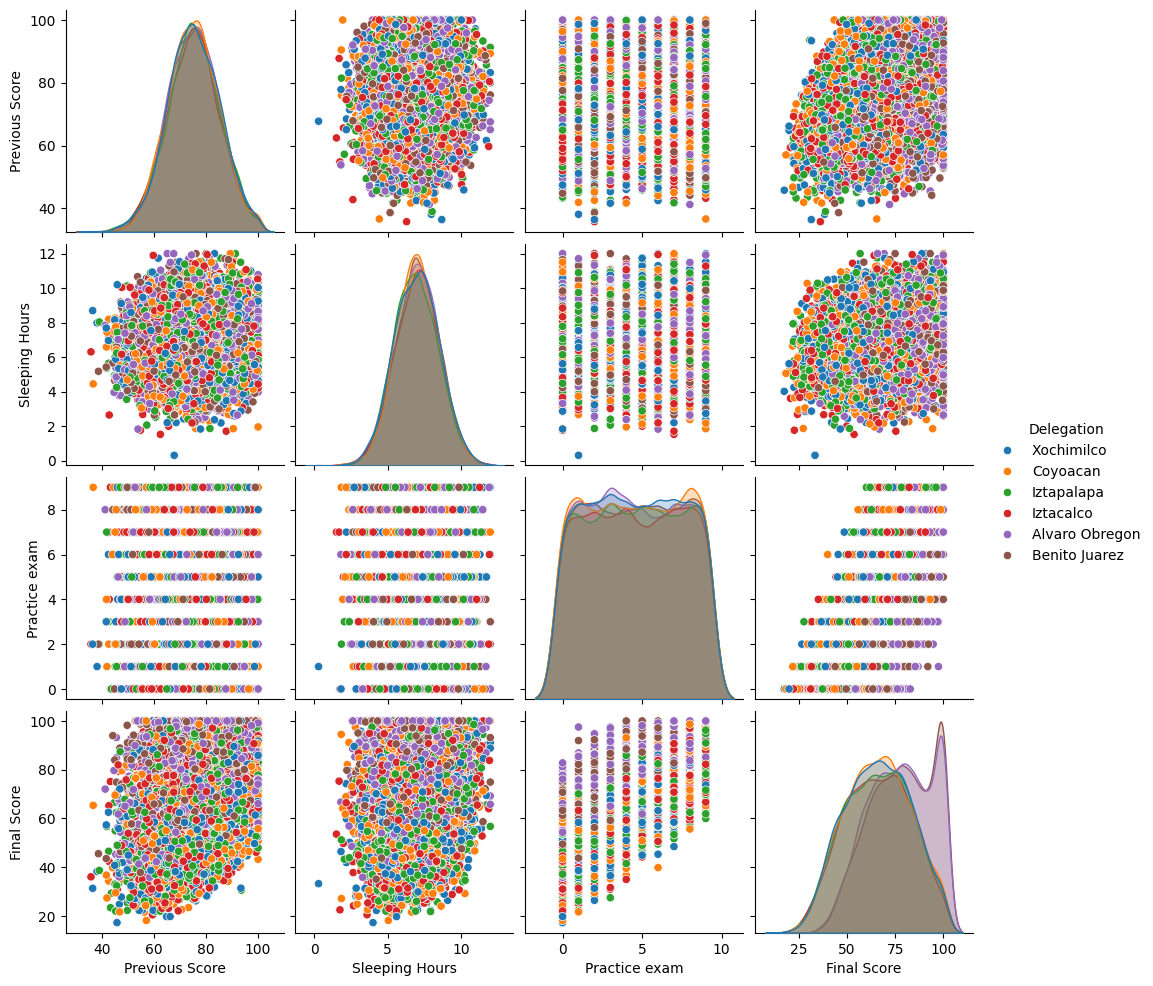

In [9]:
sns.pairplot(df, hue='Delegation')

# This one takes Delegation as hue, 

<Axes: xlabel='Delegation'>

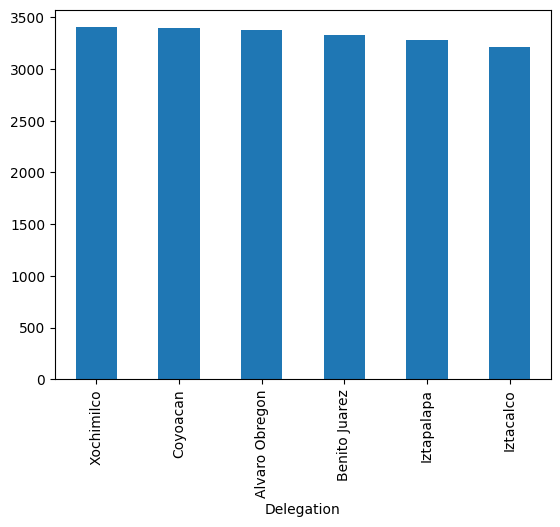

In [10]:
df['Delegation'].value_counts().plot(kind='bar')

# How many students have each delegation

In [11]:

px.scatter(df, x='Previous Score', y='Final Score', color='Delegation')

<Axes: >

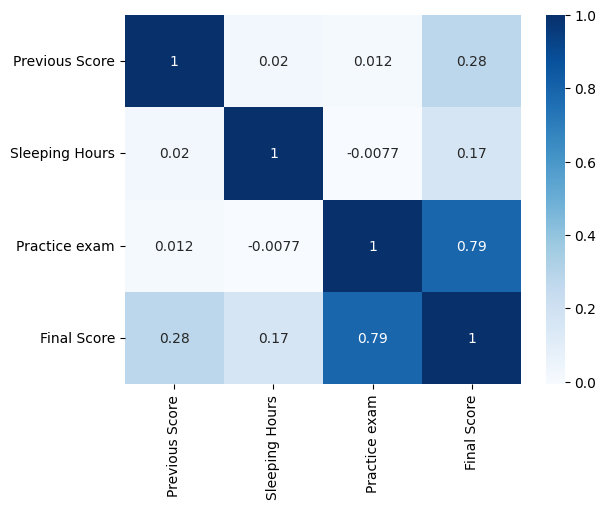

In [12]:
# Select numerical features (both float and integer types) from the DataFrame

numerical_features = df.select_dtypes(include = ['float64', 'int64']).columns.tolist()


cor_matrix = df[numerical_features].corr()


sns.heatmap(cor_matrix, annot=True, cmap = 'Blues')


In [13]:
#numerical_features.tolist()

In [14]:
# Define X and Y
# X is everything but Final score
X = df.drop('Final Score', axis = 1)
# Y is only Final score
Y = df['Final Score']

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state = 42)

# Then we train our model on 70% of the information for training data

In [16]:
df.columns.tolist()

['Previous Score',
 'Sleeping Hours',
 'Practice exam',
 'Delegation',
 'Scholarship',
 'Final Score']

In [17]:
# Divide the numerical categories
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()[:-1]

# Divide the categorical categories
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Instantiate the scaler
numerical_transformer = StandardScaler()

# Instantiate the one-hot encoder
categorical_transformer = OneHotEncoder(drop='first')


In [18]:
preprocesor = ColumnTransformer(
    transformers = [
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

model = Pipeline(
    steps = [
        ('preprocesor', preprocesor),
        ('regresor', LinearRegression())
    ]
)

In [28]:
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [20]:

print(f'''
Metrics:
RMSE: {np.sqrt(mean_squared_error(y_pred, Y_test))},
MSE: {mean_squared_error(y_pred, Y_test)}
R2: {r2_score(Y_test, y_pred)}
''')


Metrics:
RMSE: 4.974888630578931,
MSE: 24.74951688666351
R2: 0.9214170074843533



In [29]:

# We predict a new student and we add all the variables related
# to see how it will perform


New_student = pd.DataFrame(
    {
        'Previous Score': [80],
        'Sleeping Hours': [4],
        'Practice exam':[6],
        'Delegation': ['Benito Juarez'],
        'Scholarship':['No']
    }
)

In [30]:
pred=model.predict(New_student)

print(f"based on the prediction model our new student would achieve a {pred[0]} as final score")

based on the prediction model our new student would achieve a 77.4421883905252 as final score


In [ ]:
'''

aight u see, this is my df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Previous Score  20000 non-null  float64
 1   Sleeping Hours  20000 non-null  float64
 2   Practice exam   20000 non-null  int64  
 3   Delegation      20000 non-null  object 
 4   Scholarship     20000 non-null  object 
 5   Final Score     20000 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 937.6+ KB


and were trying to predict final score

u see i dont understand this code

# Instantiate the one-hot encoder
categorical_transformer = OneHotEncoder(drop='first')

preprocesor = ColumnTransformer(
    transformers = [
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

model = Pipeline(
    steps = [
        ('preprocesor', preprocesor),
        ('regresor', LinearRegression())
    ]
)


model.fit(X_train, Y_train)

and these outputs
'''